<a href="https://colab.research.google.com/github/RenilsonA/Metodos-Numericos/blob/main/M%C3%A9todos_num%C3%A9ricos_Lista_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dupla: José Renilson e Élisson Souza**

**O código a seguir são todas as funções, juntas, pois se precisar ler uma outra função em uma determinada questão, não precisa procurar e executar o outro bloco, apenas executando o código abaixo, qualquer questão rodará sem problemas.**

In [ ]:
import math as m
import matplotlib.pyplot as plt

alternativa = ["  A) ", "  B) ", "  C) ", "  D) ", "  E) "]
pi = 3.141592653589793
e = 2.718281828459045

def converteDecimal(num):
    espacos = 0
    bitsExpoente = 11
    bitsMantissa = 0
    sinal = 1
    expoente = 0
    fracao = 0
    for i in range(len(num)):
        if num[i] == ' ':
            espacos = espacos + 1
        elif espacos == 2:
            bitsMantissa = bitsMantissa + 1
            fracao = fracao + (ord(num[i]) - 48)*pow(1/2, bitsMantissa)
        elif espacos == 1:
            bitsExpoente = bitsExpoente - 1
            expoente = expoente + (ord(num[i]) - 48)*pow(2, bitsExpoente)
        elif espacos == 0:
            if num[i] == '1':
                sinal = -1
    return sinal * pow(2, expoente - 1023) * (fracao + 1)

def fatorial(num):
    x = 1
    while num > 1:
        x = num * x
        num = num - 1
    return x

def positivo(num):
    if num < 0:
        num = -num
    return num
    
def ordemdoNum(num):
    div = 1
    num = positivo(num)
    while num/div >= 1:
        div = div * 10
    return div

def truncar(num, casas):
    x = pow(10, casas)
    div = ordemdoNum(num)
    x = x/div
    return int(num*x)/x

def arredondamento(num, casas):
    x = pow(10, casas)
    num = truncar(num, casas + 1)
    adicionar = 0.0
    div = ordemdoNum(num)
    y = 1
    x = x/div
    if num < 0:
        y = -1
    if ((num*x)%y)*10 >= 5.0 or ((num*x)%y)*10 <= -5.0:
        adicionar = y/x
    return int(num*x)/x + adicionar

def Raizdelta(a, b, c):
    return pow(b * b - 4 * a * c, 0.5)

def raiz2grau(a, b, c):
    D = Raizdelta(a, b, c)
    x1 = (-b + D) / (2 * a)
    x2 = (-b - D) / (2 * a)
    return x1, x2

def erroAbsoluto(x1, x2):
    return (positivo(x1 - x2))

def erroRelativo(EA, x):
    return EA/positivo(x)

def somatorio4C(i, valor):
    x1 = 0
    while i > 0:
        x1 = x1 + (pow(-1, i)*pow(valor, i)/fatorial(i))
        i = i - 1
    return x1

#entrada: 5x2^(2x)sin(2x)ln(3x)
#i[0] = mult da funcao          i[1] = exp de X             i[2] = base da exp por X       i[3] = mult do exp vezes X     
#i[4] = func trigonometrica     i[5] = mult da func trig    i[6] = há ln                   i[7] = mult interno do ln    
#i[0] = 5, i[1] = 1, i[2] = 2, i[3] = 2, i[4] = True = seno, i[5] = 2, i[6] = True, i[7] = 3 
def funcao(equacao, x):
    f = 0
    for i in equacao:
        func = i[0]*pow(x, i[1])
        if func == 0:
            func = 1
        if len(i) >= 4:
            func = func*pow(i[2], i[3] * x)
        if len(i) >= 6:
            if i[4] == 1:
                func = func*m.sin(i[5]*x)
            elif i[4] == 2:
                func = func*m.cos(i[5]*x)
        if len(i) >= 8:
            if i[6]:
                func = func*m.log(i[7]*x, e)
        f = f + func
    return f

#funciona apenas para algumas equações simples e especialmente para as alternativas da questão 9
def derivada(equacao, x): 
    f = 0
    for i in equacao:
        func = 1
        tam = len(i)
        if x != 0:
            func = i[0]*i[1]*pow(x, i[1] - 1)
        if func == 0 and tam > 2:
            func = 1
        if tam >= 4 and i[3] != 0:
            func = - func*i[3]*m.log(i[2], e)*pow(i[2], i[3]*x)
        if tam >= 6:
            if i[1] != 0:
                if i[4] == 1:
                    func = func*(m.sin(i[5]*x) + i[5]*x*m.cos(i[5]*x))
                elif i[4] == 2:
                    func = func*(m.cos(i[5]*x) - i[5]*x*m.sin(i[5]*x))
            elif i[4] == 1:
                func = func*m.cos(i[5]*x)*i[5]*i[0]
            elif i[4] == 2:
                func = - func*m.sin(i[5]*x)*i[5]*i[0]
        if tam >= 8:
            if i[6]:
                func = func*(1/(i[7]*x))*i[7]
        f = f + func
    return f

def biseccao(x1, x2, equacao, tolerancia, iteracoes, pn):
    condicao = True
    x3 = 0
    valorPN, valorYPN = [], []
    if funcao(equacao, x1) * funcao(equacao, x2) > 0:
        print("valores da função inválidos")
        return
    while condicao and iteracoes > 0:
        x3 = (x1 + x2)/2
        y1 = funcao(equacao, x1)
        y3 = funcao(equacao, x3)
        if y1 * y3 < 0:
            x2 = x3
        else:
            x1 = x3
        valorPN.append(x3)
        valorYPN.append(funcao(equacao, x3))
        condicao = abs(funcao(equacao, x3)) > tolerancia
        iteracoes = iteracoes - 1
    if pn:
        return valorPN, valorYPN
    return x3

def newton(x, equacao, tolerancia, iteracoes, pn):
    condicao = True
    listaPN, listaYPN = [], []
    while condicao and iteracoes > 0:
        if derivada(equacao, x) == 0:
            print("Erro, dividindo por zero.")
            return
        x1 = x - funcao(equacao, x) / derivada(equacao, x)
        listaPN.append(x1)
        listaYPN.append(funcao(equacao, x1))
        if positivo(x1 - x) < tolerancia:
            if pn:
                return listaPN, listaYPN
            return x1
        x = x1
        iteracoes = iteracoes - 1
    print("Metodo de Newton falhou, iterações insuficientes.")
    return

def graficoPN(x1, x2, equacao, tolerancia, iteracoes, tipo):
    pn, ypn = [], []
    string = " "
    if tipo == 1:
        pn, ypn = biseccao(x1, x2, equacao, tolerancia, iteracoes, True)
        string = "Método de Bissecção"
    else:
        pn, ypn = newton((x1 + x2)/2, equacao, tolerancia, iteracoes, True)
        string = "Método de Newton"
    if pn:
        plt.scatter(pn, ypn, color='gray', label = 'Aproximações')
        plt.scatter(pn[-1], ypn[-1], color='red', label = 'Raiz')
        plt.title(string)

def grafico(x1, x2, equacao, delta):
    valoresx = []
    valoresy = []
    if x1 > x2:
        x3 = x1
        x1 = x2
        x2 = x3
    while x1 < x2:
        valoresx.append(x1)
        valoresy.append(funcao(equacao, x1))
        x1 = x1 + delta
    plt.plot(valoresx, valoresy, color='green', label = 'F(x)')
    plt.axvline(0, color='black')
    plt.axhline(0, color='black')
    plt.legend()                  
    plt.show()

def pontoFixo(A, p0, tolerancia, N):
    p = 0
    i = N
    while i > 0:
        p = 2*p0 - A*p0*p0
        if positivo(p - p0) < tolerancia:
            return p
        p0 = p
        i = i - 1
    print("Falhou")
    return -1


1. (Questão teórica) Considerando a representação em ponto flutuante
com 64 bits, determine a representação decimal dos números abaixo.

    a) 0 10000001010 1001001100000000000000001000000000001000000000000000

    b) 1 10000001010 1001001100000000001000000000000000000000000000000000

    c) 0 01111011111 0101001100000000000000000000000000000000000001000000

    d) 0 01011111011 0101001100000000000000000000000000000000001000000001

In [ ]:
alternativa = ["  A) ", "  B) ", "  C) ", "  D) ", "  E) "]

def converteDecimal(num):
    espacos = 0
    bitsExpoente = 11
    bitsMantissa = 0
    sinal = 1
    expoente = 0
    fracao = 0
    for i in range(len(num)):
        if num[i] == ' ':
            espacos = espacos + 1
        elif espacos == 2:
            bitsMantissa = bitsMantissa + 1
            fracao = fracao + (ord(num[i]) - 48)*pow(1/2, bitsMantissa)
        elif espacos == 1:
            bitsExpoente = bitsExpoente - 1
            expoente = expoente + (ord(num[i]) - 48)*pow(2, bitsExpoente)
        elif espacos == 0:
            if num[i] == '1':
                sinal = -1
    return sinal * pow(2, expoente - 1023) * (fracao + 1)

valores = ["0 10000001010 1001001100000000000000001000000000001000000000000000",
            "1 10000001010 1001001100000000001000000000000000000000000000000000",
            "0 01111011111 0101001100000000000000000000000000000000000001000000",
            "0 01011111011 0101001100000000000000000000000000000000001000000001"]
altern = 0
for i in valores:
    valor = converteDecimal(i)
    print(alternativa[altern], valor)
    altern = altern + 1

  A)  3224.0000610500574
  B)  -3224.00390625
  C)  3.08318703901026e-10
  D)  7.14761020551091e-79


2. Implemente algoritmos para calcular o erro absoluto e o erro relativo
das aproximações de p por p* nos casos abaixo:

a) p = π e p∗ = 3

b) p = √2 e p∗ = 1, 414

c) p = e^10 e p∗ = 22000

d) p = 9! e p∗ =√(18π)(9/e)^9

In [ ]:
alternativa = ["  A) ", "  B) ", "  C) ", "  D) ", "  E) "]

def erroAbsoluto(x1, x2):
    return (positivo(x1 - x2))

def erroRelativo(EA, x):
    return EA/positivo(x)


print("Questão 2:")
dadosP  = [pi, pow(2, 0.5), pow(e, 10), fatorial(9)]
dadosP2 = [3, 1.414, 22000, (pow(pi*18, 0.5)*pow((9/e), 9))]
for i in range(4):
    EA = erroAbsoluto(dadosP[i], dadosP2[i])
    ER = erroRelativo(EA, dadosP[i])
    print(alternativa[i] + "Erro absoluto de", EA, "e erro relativo de", ER)

Questão 2:
  A) Erro absoluto de 0.14159265358979312 e erro relativo de 0.04507034144862795
  B) Erro absoluto de 0.00021356237309522186 e erro relativo de 0.00015101140222192286
  C) Erro absoluto de 26.465794806703343 e erro relativo de 0.0012015452253326688
  D) Erro absoluto de 3343.1271580516477 e erro relativo de 0.009212762230080598


3. Suponha que p∗ deva aproximar p com erro relativo máximo de 10^−3. Determine o maior intervalo no qual p∗ pode estar para os valores de p abaixo:

    a) p = 150

    b) p = 900

    c) p = 1500

    d) p = 90

In [ ]:
print("Questão 3:")
dadosP  = [150, 900, 1500, 90]
for i in range(len(dadosP)):  
    # (|p - p*|/|p|) <= 10^-3 >> |p - p*| <= p*10^-3 >> - p - p*10^-3 <= - p* <= - p + p*10^-3 >>
    # p + p*10^-3 <= p* <= p - p*10^-3 
    LSnfP2 = dadosP[i] + dadosP[i]*pow(10, -3)
    LInfP2 = dadosP[i] - dadosP[i]*pow(10, -3)
    print(alternativa[i] + "O intervalo de p* é de:", LInfP2, "<= p* <=", LSnfP2)

Questão 3:
  A) O intervalo de p* é de: 149.85 <= p* <= 150.15
  B) O intervalo de p* é de: 899.1 <= p* <= 900.9
  C) O intervalo de p* é de: 1498.5 <= p* <= 1501.5
  D) O intervalo de p* é de: 89.91 <= p* <= 90.09


4. Implemente algoritmos para realizar os cálculos abaixo usando truncamento com 3 dígitos, truncamento com 4 dígitos, arredondamento com 3
dígitos e arrendondamento com 4 dígitos. Realize o cálculo exato e calcule os erros absoluto e relativo de cada aproximação para cada item abaixo. Obs.: considere como cálculo exato aquele realizado em Python com sua precisão padrão. Você pode usar a biblioteca decimal do Python para obter aproximações dos números.

    a) −10π + 6e − 0, 327

    b) x, tal que (1/3)x^2 − (123/4)x + 16 = 0

    c) e^−5, usando a aproximação e^−5 ≈ (((-1)^i)(5^i))/i! com 1 <= i <= 9 

In [ ]:

def fatorial(num):
    x = 1
    while num > 1:
        x = num * x
        num = num - 1
    return x

def positivo(num):
    if num < 0:
        num = -num
    return num
    
def ordemdoNum(num):
    div = 1
    num = positivo(num)
    while num/div >= 1:
        div = div * 10
    return div

def truncar(num, casas):
    x = pow(10, casas)
    div = ordemdoNum(num)
    x = x/div
    return int(num*x)/x

def arredondamento(num, casas):
    x = pow(10, casas)
    num = truncar(num, casas + 1)
    adicionar = 0.0
    div = ordemdoNum(num)
    y = 1
    x = x/div
    if num < 0:
        y = -1
    if ((num*x)%y)*10 >= 5.0 or ((num*x)%y)*10 <= -5.0:
        adicionar = y/x
    return int(num*x)/x + adicionar

def Raizdelta(a, b, c):
    return pow(b * b - 4 * a * c, 0.5)

def raiz2grau(a, b, c):
    D = Raizdelta(a, b, c)
    x1 = (-b + D) / (2 * a)
    x2 = (-b - D) / (2 * a)
    return x1, x2

def erroAbsoluto(x1, x2):
    return (positivo(x1 - x2))

def erroRelativo(EA, x):
    return EA/positivo(x)

def somatorio4C(i, valor):
    x1 = 0
    while i > 0:
        x1 = x1 + (pow(-1, i)*pow(valor, i)/fatorial(i))
        i = i - 1
    return x1

print("Questão 4:")

######################### Letra A #########################
x = -10*pi + 6*e - 0.327
xtrunc3 = -10*truncar(pi, 3) + 6*truncar(e, 3) - 0.327
xtrunc4 = -10*truncar(pi, 4) + 6*truncar(e, 4) - 0.327
xtrunc4 = truncar(xtrunc4, 4)
xarred3 = -10*arredondamento(pi, 3) + 6*arredondamento(e, 3) - 0.327
xarred4 = -10*arredondamento(pi, 4) + 6*arredondamento(e, 4) - 0.327
xarred4 = arredondamento(xarred4, 4)
EA = erroAbsoluto(x, xtrunc3)
ER = erroRelativo(EA, x)
print(alternativa[0] + "Truncamento de 3 casas: erro absoluto de", EA, "e erro relativo de", ER)
EA = erroAbsoluto(x, xtrunc4)
ER = erroRelativo(EA, x)
print("   Truncamento de 4 casas: erro absoluto de", EA, "e erro relativo de", ER)
EA = erroAbsoluto(x, xarred3)
ER = erroRelativo(EA, x)
print("   Arredondamento de 3 casas: erro absoluto de", EA, "e erro relativo de", ER)
EA = erroAbsoluto(x, xarred4)
ER = erroRelativo(EA, x)
print("   Arredondamento de 3 casas: erro absoluto de", EA, "e erro relativo de", ER)

######################### Letra B #########################
a, b, c = 1/3, -123/4, 1/6
x1, x2 = raiz2grau(a, b, c)
At3, At4 = truncar(a, 3), truncar(a, 4)
Bt3, Bt4 = truncar(b, 3), truncar(b, 4)
Ct3, Ct4 = truncar(c, 3), truncar(c, 4)
Aa3, Aa4 = arredondamento(a, 3), arredondamento(a, 4)
Ba3, Ba4 = arredondamento(b, 3), arredondamento(b, 4)
Ca3, Ca4 = arredondamento(c, 3), arredondamento(c, 4)
x1t3, x2t3 = raiz2grau(At3, Bt3, Ct3)
x1t4, x2t4 = raiz2grau(At4, Bt4, Ct4)
x1a3, x2a3 = raiz2grau(Aa3, Ba3, Ca3)
x1a4, x2a4 = raiz2grau(Aa4, Ba4, Ca4)
x1trunc3, x2trunc3 = truncar(x1t3, 3), truncar(x2t3, 3)
x1trunc4, x2trunc4 = truncar(x1t4, 4), truncar(x2t4, 4)
x1arred3, x2arred3 = arredondamento(x1a3, 3), arredondamento(x2a3, 3)
x1arred4, x2arred4 = arredondamento(x1a4, 4), arredondamento(x2a4, 4)
EA = erroAbsoluto(x1, x1trunc3)
ER = erroRelativo(EA, x1)
EA2 = erroAbsoluto(x2, x2trunc3)
ER2 = erroRelativo(EA2, x2)
print(alternativa[1] + "Truncamento de 3 casas: erro absoluto de X1", EA, "e de X2", EA2, "e erro relativo de X1", ER, "e de X2", ER2)
EA = erroAbsoluto(x1, x1trunc4)
ER = erroRelativo(EA, x1)
EA2 = erroAbsoluto(x2, x2trunc4)
ER2 = erroRelativo(EA2, x2)
print("     Truncamento de 4 casas: erro absoluto de X1", EA, "e de X2", EA2, "e erro relativo de X1", ER, "e de X2", ER2)
EA = erroAbsoluto(x1, x1arred3)
ER = erroRelativo(EA, x1)
EA2 = erroAbsoluto(x2, x2arred3)
ER2 = erroRelativo(EA2, x2)
print("     Arredondamento de 3 casas: erro absoluto de X1", EA, "e de X2", EA2, "e erro relativo de X1", ER, "e de X2", ER2)
EA = erroAbsoluto(x1, x1arred4)
ER = erroRelativo(EA, x1)
EA2 = erroAbsoluto(x2, x2arred4)
ER2 = erroRelativo(EA2, x2)
print("     Arredondamento de 3 casas: erro absoluto de X1", EA, "e de X2", EA2, "e erro relativo de X1", ER, "e de X2", ER2)

######################### Letra C #########################
x = pow(e, -5)
x1 = somatorio4C(9, 5)
xtrunc3 = truncar(x1, 3)
xtrunc4 = truncar(x1, 4)
xarred3 = arredondamento(x1, 3)
xarred4 = arredondamento(x1, 4)
print(xtrunc3, xtrunc4, xarred3, xarred4)
EA = erroAbsoluto(x, xtrunc3)
ER = erroRelativo(EA, x)
print(alternativa[2] + "Truncamento de 3 casas: erro absoluto de X1", EA, "e erro relativo de X1", ER)
EA = erroAbsoluto(x, xtrunc4)
ER = erroRelativo(EA, x)
print("     Truncamento de 4 casas: erro absoluto de X1", EA, "e erro relativo de X1", ER)
EA = erroAbsoluto(x, xarred3)
ER = erroRelativo(EA, x)
print("     Arredondamento de 3 casas: erro absoluto de X1", EA, "e erro relativo de X1", ER)
EA = erroAbsoluto(x, xarred4)
ER = erroRelativo(EA, x)
print("     Arredondamento de 3 casas: erro absoluto de X1", EA, "e erro relativo de X1", ER)

Questão 4:
  A) Truncamento de 3 casas: erro absoluto de 0.033764434856344394 e erro relativo de 0.002187774217131902
   Truncamento de 4 casas: erro absoluto de 0.013235565143659755 e erro relativo de 0.0008576014464233672
   Arredondamento de 3 casas: erro absoluto de 0.02623556514365788 e erro relativo de 0.0016999393959171818
   Arredondamento de 3 casas: erro absoluto de 0.006764434856339818 e erro relativo de 0.00043830309125958395
  B) Truncamento de 3 casas: erro absoluto de X1 0.14457962731231078 e de X2 0.00042037268769490755 e erro relativo de X1 0.0015673509261622002 e de X2 0.07755420372647423
     Truncamento de 4 casas: erro absoluto de X1 0.005420372687694908 e de X2 2.0372687694907368e-05 e erro relativo de X1 5.8760880147043483e-05 e de X2 0.0037585400245921372
     Arredondamento de 3 casas: erro absoluto de X1 0.2554203726876949 e de X2 0.00042037268769490755 e erro relativo de X1 0.0027689472239956804 e de X2 0.07755420372647423
     Arredondamento de 3 casas: erro

5. Implemente o Método da Bisecção e o Método de Newton para resolver f(x) = 0, de modo que f seja um dos parâmetros de entrada.

In [ ]:
#entrada: 5x2^(2x)sin(2x)ln(3x) (uma equação que tem todos os tipos de termos que tem na lista, usei esse tipo de formula para a função abaixo)
#i[0] = mult da funcao          i[1] = exp de X             i[2] = base da exp por X       i[3] = mult do exp vezes X     
#i[4] = func trigonometrica     i[5] = mult da func trig    i[6] = há ln                   i[7] = mult interno do ln    
#i[0] = 5, i[1] = 1, i[2] = 2, i[3] = 2, i[4] = True = seno, i[5] = 2, i[6] = True, i[7] = 3 
def funcao(equacao, x):
    f = 0
    for i in equacao:
        func = i[0]*pow(x, i[1])
        if func == 0:
            func = 1
        if len(i) >= 4:
            func = func*pow(i[2], i[3] * x)
        if len(i) >= 6:
            if i[4] == 1:
                func = func*m.sin(i[5]*x)
            elif i[4] == 2:
                func = func*m.cos(i[5]*x)
        if len(i) >= 8:
            if i[6]:
                func = func*m.log(i[7]*x, e)
        f = f + func
    return f

#funciona apenas para algumas equações simples e especialmente para as alternativas da questão 9
def derivada(equacao, x): 
    f = 0
    for i in equacao:
        func = 1
        tam = len(i)
        if x != 0:
            func = i[0]*i[1]*pow(x, i[1] - 1)
        if func == 0 and tam > 2:
            func = 1
        if tam >= 4 and i[3] != 0:
            func = - func*i[3]*m.log(i[2], e)*pow(i[2], i[3]*x)
        if tam >= 6:
            if i[1] != 0:
                if i[4] == 1:
                    func = func*(m.sin(i[5]*x) + i[5]*x*m.cos(i[5]*x))
                elif i[4] == 2:
                    func = func*(m.cos(i[5]*x) - i[5]*x*m.sin(i[5]*x))
            elif i[4] == 1:
                func = func*m.cos(i[5]*x)*i[5]*i[0]
            elif i[4] == 2:
                func = - func*m.sin(i[5]*x)*i[5]*i[0]
        if tam >= 8:
            if i[6]:
                func = func*(1/(i[7]*x))*i[7]
        f = f + func
    return f

def biseccao(x1, x2, equacao, tolerancia, iteracoes, pn):
    condicao = True
    x3 = 0
    valorPN, valorYPN = [], []
    if funcao(equacao, x1) * funcao(equacao, x2) > 0:
        print("valores da função inválidos")
        return
    while condicao and iteracoes > 0:
        x3 = (x1 + x2)/2
        y1 = funcao(equacao, x1)
        y3 = funcao(equacao, x3)
        if y1 * y3 < 0:
            x2 = x3
        else:
            x1 = x3
        valorPN.append(x3)
        valorYPN.append(funcao(equacao, x3))
        condicao = abs(funcao(equacao, x3)) > tolerancia
        iteracoes = iteracoes - 1
    if pn:
        return valorPN, valorYPN
    return x3

def newton(x, equacao, tolerancia, iteracoes, pn):
    condicao = True
    listaPN, listaYPN = [], []
    while condicao and iteracoes > 0:
        if derivada(equacao, x) == 0:
            print("Erro, dividindo por zero.")
            return
        x1 = x - funcao(equacao, x) / derivada(equacao, x)
        listaPN.append(x1)
        listaYPN.append(funcao(equacao, x1))
        if positivo(x1 - x) < tolerancia:
            if pn:
                return listaPN, listaYPN
            return x1
        x = x1
        iteracoes = iteracoes - 1
    print("Metodo de Newton falhou, iterações insuficientes.")
    return


print("As funções estão no cabeçalho, com nomes de função (deve-se digitar nos vetores acima os valores")
print("respectivos dos termos multiplicadores e seus graus, em constantes, colocar como 0), derivada,")
print("biseccao(último parametro pode por false por enquanto, pois ele define o retorno de pn's da questão")
print("7) e newton (último parâmetro como False também).")

As funções estão no cabeçalho, com nomes de função (deve-se digitar nos vetores acima os valores
respectivos dos termos multiplicadores e seus graus, em constantes, colocar como 0), derivada,
biseccao(último parametro pode por false por enquanto, pois ele define o retorno de pn's da questão
7) e newton (último parâmetro como False também).


6. Implemente uma função que receba f, a, b e ∆ e plote o gráfico de y = f(x) restrito ao intervalo [a, b], amostrando uniformemente o domínio entre a e b com passo ∆, e usando segmentas de reta.

In [ ]:
def grafico(x1, x2, equacao, delta):
    valoresx = []
    valoresy = []
    if x1 > x2:
        x3 = x1
        x1 = x2
        x2 = x3
    while x1 < x2:
        valoresx.append(x1)
        valoresy.append(funcao(equacao, x1))
        x1 = x1 + delta
    plt.plot(valoresx, valoresy, color='green', label = 'F(x)')
    plt.axvline(0, color='black')
    plt.axhline(0, color='black')
    plt.legend()                  
    plt.show()

print("A função também está no cabeçalho")

A função está no cabeçalho e é chamada de grafico, onde ela calcula cada ponto de y dado um intervalo de x


7. Implemente uma função que receba f e uma tolerância (TOL), e retorne o array com a sequência pn de aproximações da raiz.

In [ ]:
def graficoPN(x1, x2, equacao, tolerancia, iteracoes, tipo):
    pn, ypn = [], []
    string = " "
    if tipo == 1:
        pn, ypn = biseccao(x1, x2, equacao, tolerancia, iteracoes, True)
        string = "Método de Bissecção"
    else:
        pn, ypn = newton((x1 + x2)/2, equacao, tolerancia, iteracoes, True)
        string = "Método de Newton"
    if pn:
        plt.scatter(pn, ypn, color='gray', label = 'Aproximações')
        plt.scatter(pn[-1], ypn[-1], color='red', label = 'Raiz')
        plt.title(string)

print("As funções de bisseccao e newton já fazem isso, basta colocar o termo pn como True, que eles retornam os valores de pn e Y(pn).")

As funções de bisseccao e newton já fazem isso, basta colocar o termo pn como True, que eles retornam os valores de pn e Y(pn).


8. Combinando os resultados das questões 6 e 7, implemente um algoritmo que plote o gráfico de y = f(x) junto com a sequência de pontos (pn, f(pn)). O gráfico deve ser uma curva poligonal (i.e. segmentos de reta conectados).

In [ ]:
def graficoPN(x1, x2, equacao, tolerancia, iteracoes, tipo):
    pn, ypn = [], []
    string = " "
    if tipo == 1:
        pn, ypn = biseccao(x1, x2, equacao, tolerancia, iteracoes, True)
        string = "Método de Bissecção"
    else:
        pn, ypn = newton((x1 + x2)/2, equacao, tolerancia, iteracoes, True)
        string = "Método de Newton"
    if pn:
        plt.scatter(pn, ypn, color='gray', label = 'Aproximações')
        plt.scatter(pn[-1], ypn[-1], color='red', label = 'Raiz')
        plt.title(string)


def grafico(x1, x2, equacao, delta):
    valoresx = []
    valoresy = []
    if x1 > x2:
        x3 = x1
        x1 = x2
        x2 = x3
    while x1 < x2:
        valoresx.append(x1)
        valoresy.append(funcao(equacao, x1))
        x1 = x1 + delta
    plt.plot(valoresx, valoresy, color='green', label = 'F(x)')
    plt.axvline(0, color='black')
    plt.axhline(0, color='black')
    plt.legend()                  
    plt.show()

print("As funções de graficoPN e grafico do cabeçalho resolve quando colocadas em seguidas, pois á funcao grafico mostra o gráfico integrando ambas soluções")
print("onde deve-se passar o intervado [x1, x2], equação, a tolerância e")
print("o número máximo de iterações. Essa função já pega os valores de pn e Y(pn), logo não precisa definir nada.")

As funções de graficoPN e grafico do cabeçalho resolve quando colocadas em seguidas, pois á funcao grafico mostra o gráfico integrando ambas soluções
onde deve-se passar o intervado [x1, x2], equação, a tolerância e
o número máximo de iterações. Essa função já pega os valores de pn e Y(pn), logo não precisa definir nada.


9. Gere resultados das questões 5, 6, 7 e 8 para as seguintes equações. Gerar resultado significa resolver a equação (com cada um dos dois métodos) e plotar os gráficos da questão 8. Use uma tolerância adequada.

    a) x − 2^−x = 0, [0, 1]

    b) x + 1 − 2 sen(πx) = 0, [0, 0.5]

    c) 2x cos(2x) − (x + 1)^2 = 0, [−3, −2]

    d) ln(x) − 2^x + x^2 = 0, [3, 5]

  A) 
     Valor de pn e F(pn) em bisecção: 0.6412353515625 e 7.165384520102513e-05
     Valor de pn e F(pn) na função Newton: 0.6411857445049576 e -4.107825191113079e-14
     Valores de pn e Y(pn), com base na função  Newton [0.6389858000324148, 0.6411852281272069, 0.6411857445049576] [-0.0031784250401373226, -7.458747417476985e-07, -4.107825191113079e-14]


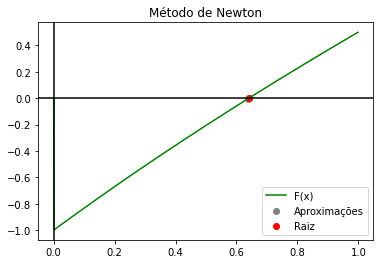

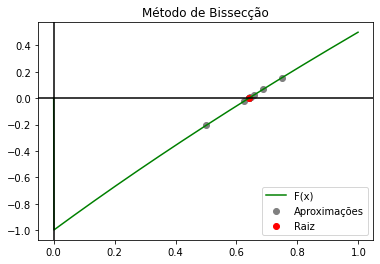

  B) 
     Valor de pn e F(pn) em bisecção: 0.2060546875 e -7.850958069632874e-05
     Valor de pn e F(pn) na função Newton: 0.20603511896461532 e 2.4328434822251666e-09
     Valores de pn e Y(pn), com base na função  Newton [0.20230347202541413, 0.20601490020938795, 0.20603511896461532] [0.015054833110085264, 8.112801743598297e-05, 2.4328434822251666e-09]


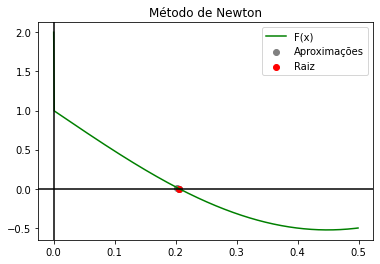

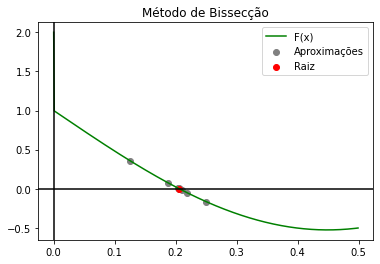

  C) 
     Valor de pn e F(pn) em bisecção: -2.191314697265625 e -6.704144808011847e-05
     Valor de pn e F(pn) na função Newton: -2.1913080117973145 e -6.803446694902959e-13
     Valores de pn e Y(pn), com base na função  Newton [-2.2211802368704023, -2.191935267416402, -2.1913083103925417, -2.1913080117973145] [-0.3062419311030391, -0.00629304532822994, -2.994279928447696e-06, -6.803446694902959e-13]


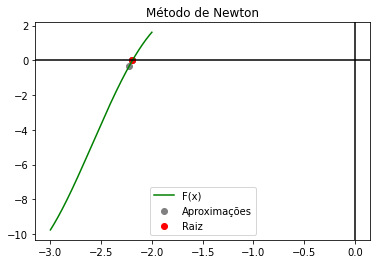

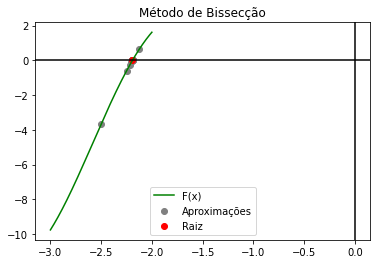

  D) 
     Valor de pn e F(pn) em bisecção: 4.349945068359375 e -8.260238573143397e-06
     Valor de pn e F(pn) na função Newton: 4.349943481380083 e -3.552713678800501e-15
     Valores de pn e Y(pn), com base na função  Newton [4.488070827525328, 4.362695740577665, 4.350064673400875, 4.3499434924548845, 4.349943481380083] [-0.7968870013233627, -0.06701617562173467, -0.0006308622333826008, -5.7644353290697836e-08, -3.552713678800501e-15]


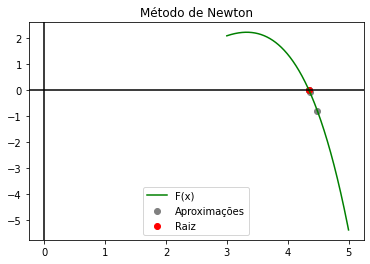

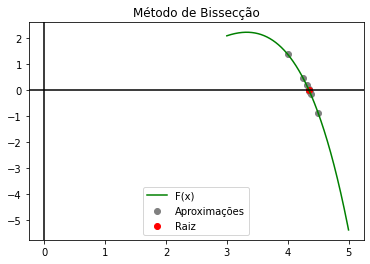

In [ ]:
#formatação está no comentário de cabeçalho da função funcao, pois está formatada para resolver apenas funções respectivas da atividade
#Comentários da linha 70 para entender melhor.
equacao = [((1, 1), (-1, 0, 2, -1)), 
            ((1, 1), (1, 0), (-2, 0, 1, 0, 1, pi)), 
            ((2, 1, 1, 0, 2, 2), (-1, 2), (-2, 1), (-1, 0)), 
            ((1, 0, 1, 0, 0, 0, True, 1), (-1, 0, 2, 1), (1, 2))]
intervalo = [(0, 1), (0, 0.5), (-3, -2), (3, 5)]
tolerancia = pow(10, -4)
iteracoes = 20
func = ["Bisecção", "Newton"]
#Tipo 1 = biseccao (muitos pontos), Tipo 2 = Newton (menos pontos)
tipo = 2
delta = 0.001
for i in range(len(equacao)):
    valorX3 = biseccao(intervalo[i][0], intervalo[i][1], equacao[i], tolerancia, iteracoes, False)
    valorX2 = newton((intervalo[i][0] + intervalo[i][1]) / 2, equacao[i], tolerancia, iteracoes, False)
    valorY3 = funcao(equacao[i], valorX3)
    valorY2 = funcao(equacao[i], valorX2)
    pn, ypn = newton((intervalo[i][0] + intervalo[i][1]) / 2, equacao[i], tolerancia, iteracoes, True)
    
    print(alternativa[i])
    print("     Valor de pn e F(pn) em bisecção:", valorX3, "e", valorY3)
    print("     Valor de pn e F(pn) na função Newton:", valorX2, "e", valorY2)
    print("     Valores de pn e Y(pn), com base na função ", func[tipo - 1], pn, ypn)

    graficoPN(intervalo[i][0], intervalo[i][1], equacao[i], tolerancia, iteracoes, tipo)
    grafico(intervalo[i][0], intervalo[i][1], equacao[i], delta)

    graficoPN(intervalo[i][0], intervalo[i][1], equacao[i], tolerancia, iteracoes, tipo - 1)
    grafico(intervalo[i][0], intervalo[i][1], equacao[i], delta)

10. Seja g(x) = 2x − Ax^2, onde A é uma constante positiva.

    a) (Questão teórica) Mostre que se a iteração de ponto fixo convergir para
    um limite não nulo, este limite é p = 1/A.

    b) Implemente um algoritmo baseado na iteração de ponto fixo para calcular o
    inverso 1/A de um número positivo qualquer A, usando apenas multiplicações
    e subtrações.

    c) (Questão teórica) Encontre um intervalo onde a iteração de ponto fixo
    acima converge.

In [ ]:
def pontoFixo(A, p0, tolerancia, N):
    p = 0
    i = N
    while i > 0:
        p = 2*p0 - A*p0*p0
        if positivo(p - p0) < tolerancia:
            return p
        p0 = p
        i = i - 1
    print("Falhou")
    return -1

print(alternativa[0], "Se g(x) = 2x-Ax², g(p) = p = 2p-Ap², e assumindo que A > 0")
print("      Encontrando as raizes da equação algebricamente, temos que:")
print("      2p - Ap² - p = 0")
print("      p(1 - Ap) = 0")
print("      Extraindo as raízes")
print("      p' = 0")
print("      1 - Ap = 0")
print("      p = 1/A")
print("      Como A > 0, logo p converge.")
print("      Logo a iteração é válida.")

A = 2
p = 0.99
p = pontoFixo(A, p, 0.0001, 100)
print(alternativa[1], p)

print(alternativa[2], "Igualando a equação dada a zero, podemos encontrar as raizes da equação algebricamente:")
print("      2p - Ap² = 0")
print("      p(2 - Ap) = 0")
print("      Extraindo as raízes")
print("      p' = 0")
print("      2 - Ap = 0")
print("      p'' = 2/A")
print("      Logo, temos que no invervalo [0, 2/A] existe uma raiz válida.")
print("      Então, podemos afirmar que o intervalo varia de 0 <= g(x) <= 2/A")

  A)  Se g(x) = 2x-Ax², g(p) = p = 2p-Ap², e assumindo que A > 0
      Encontrando as raizes da equação algebricamente, temos que:
      2p - Ap² - p = 0
      p(1 - Ap) = 0
      Extraindo as raízes
      p' = 0
      1 - Ap = 0
      p = 1/A
      Como A > 0, logo p converge.
      Logo a iteração é válida.
  B)  0.4999999994818309
  C)  Igualando a equação dada a zero, podemos encontrar as raizes da equação algebricamente:
      2p - Ap² = 0
      p(2 - Ap) = 0
      Extraindo as raízes
      p' = 0
      2 - Ap = 0
      p'' = 2/A
      Logo, temos que no invervalo [0, 2/A] existe uma raiz válida.
      Então, podemos afirmar que o intervalo varia de 0 <= g(x) <= 2/A
